In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

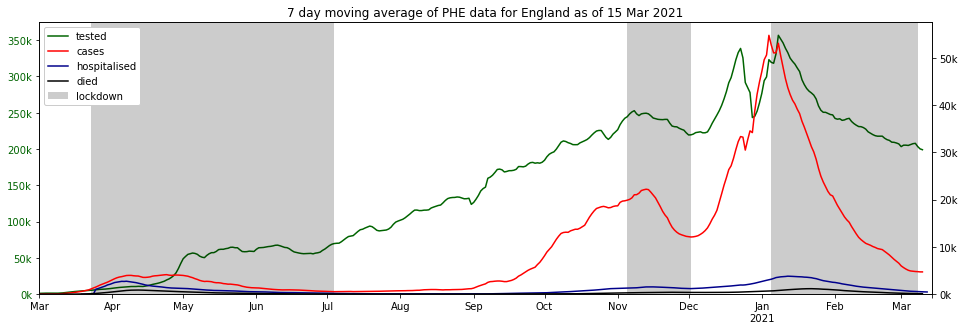

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum,),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

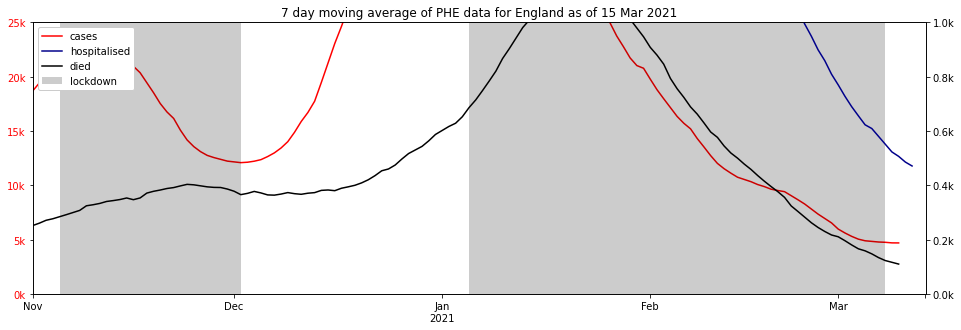

In [3]:
plot_summary(earliest_date='2020-11-01',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=25_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter, right_ymax=1_000)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,1129444.0,20791838.0,19662394.0,56286961,2.006582,34.932414,63.061004
1,Northern Ireland,N92000002,54636.0,629461.0,574825.0,1893667,2.885196,30.355126,66.759678
2,Scotland,S92000003,161945.0,1908991.0,1747046.0,5463300,2.964234,31.977852,65.057914
3,Wales,W92000004,264255.0,1122931.0,858676.0,3152879,8.381387,27.234664,64.383949


'partial: 24,453,221 (36.6%), full: 1,610,280'

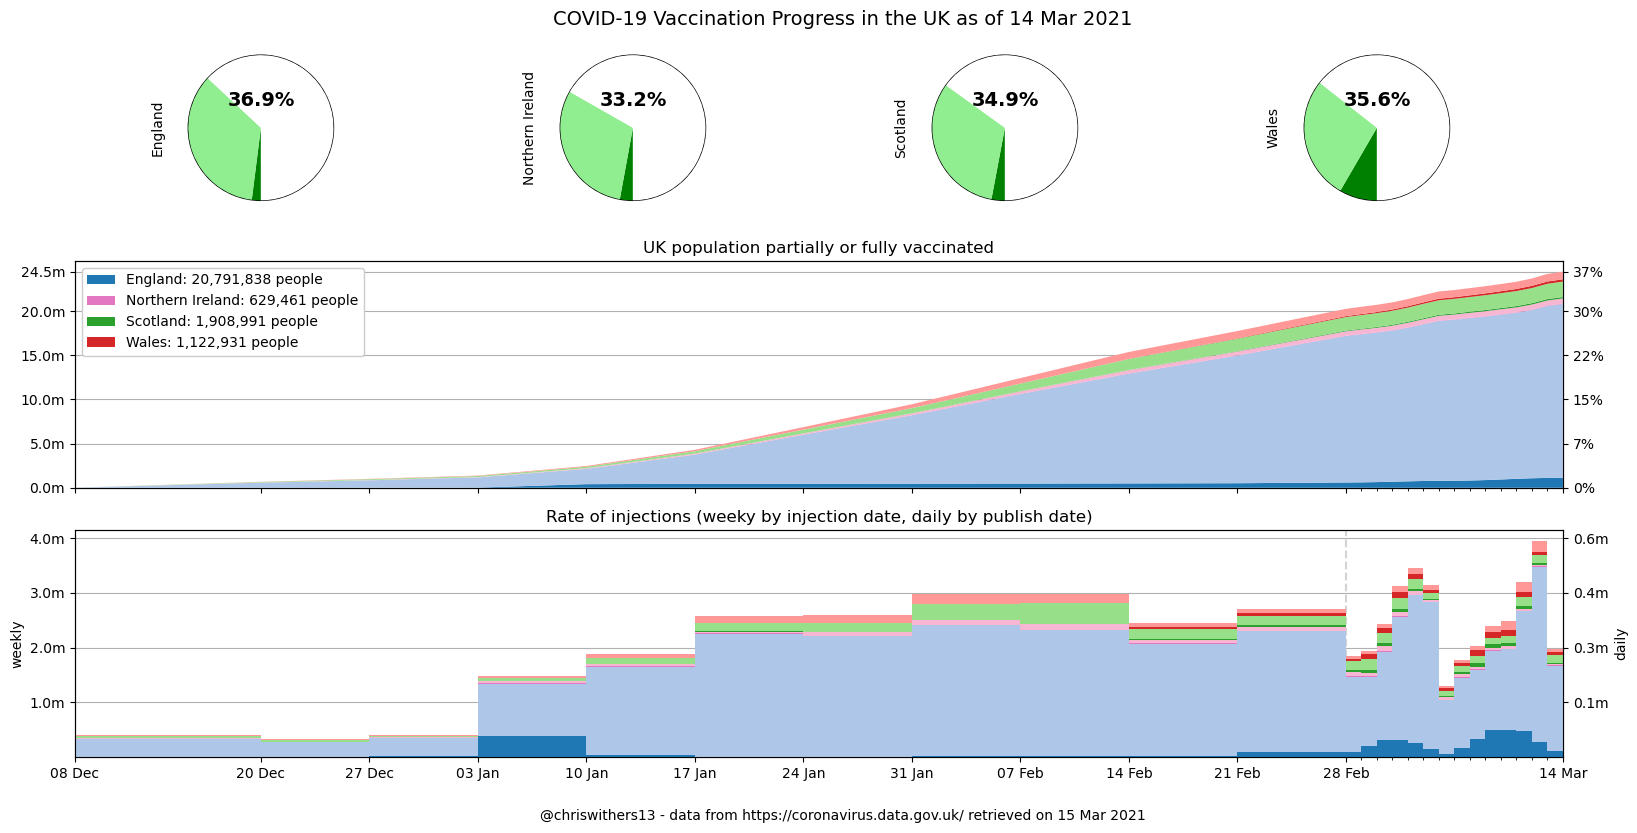

In [4]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,14 Mar 21,"+223,017","+14,378","+14,378","+20,791,838","+1,129,444","+1,129,444"
Northern Ireland,14 Mar 21,"+4,266","+2,229","+2,229","+629,461","+54,636","+54,636"
Scotland,14 Mar 21,"+20,294","+1,907","+1,907","+1,908,991","+161,945","+161,945"
Wales,14 Mar 21,"+9,433","+6,857","+6,857","+1,122,931","+264,255","+264,255"


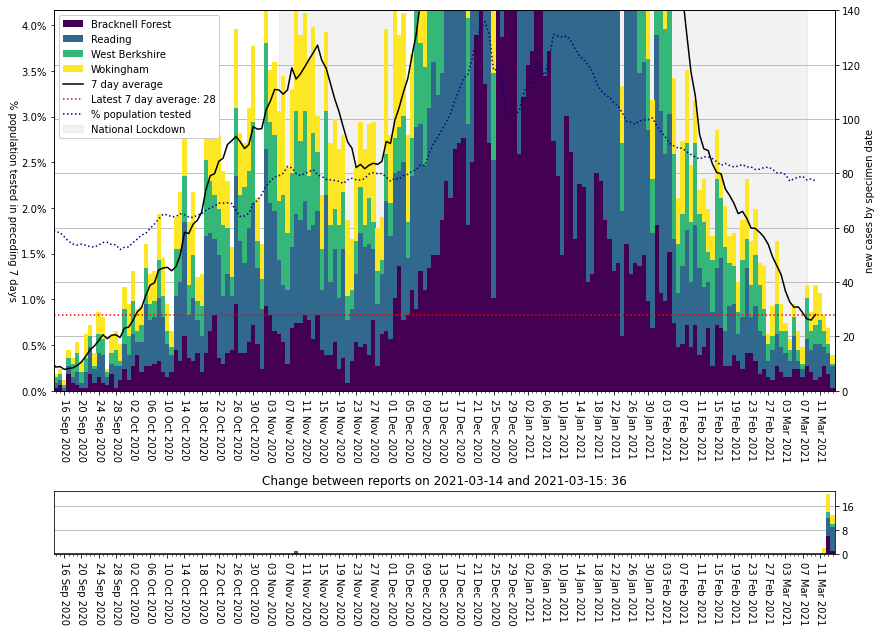

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=140)

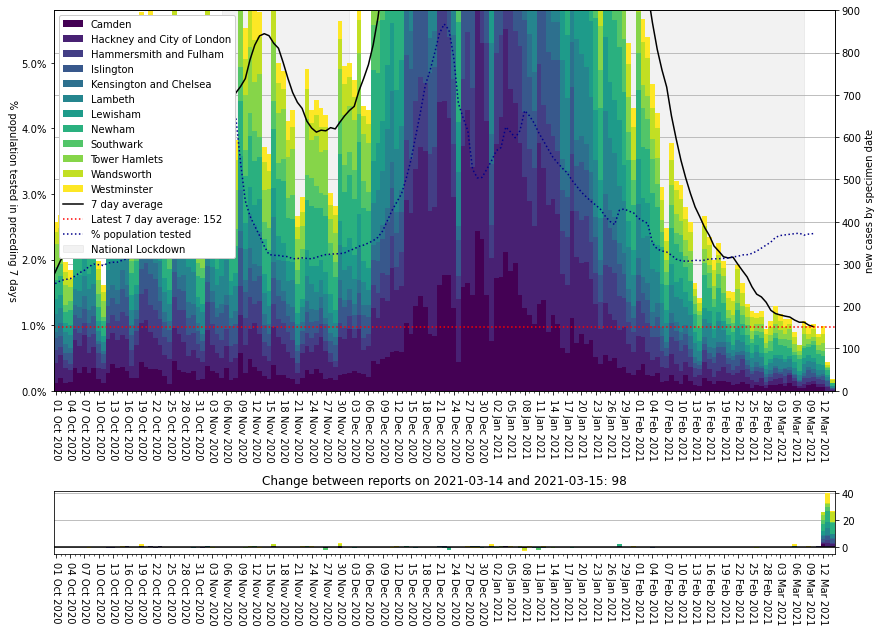

In [7]:
plot_areas(for_date, areas=london_areas, ylim=900)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,184.164613,133.0,2021-03-14
E08000016,Barnsley,159.195677,393.0,2021-03-14
E06000010,"Kingston upon Hull, City of",155.902347,405.0,2021-03-14
E07000236,Redditch,152.472995,130.0,2021-03-14
E06000012,North East Lincolnshire,141.636846,226.0,2021-03-14
E08000032,Bradford,133.944451,723.0,2021-03-14
W06000024,Merthyr Tydfil,130.955144,79.0,2021-03-14
E06000013,North Lincolnshire,127.690200,220.0,2021-03-14
E08000018,Rotherham,124.335465,330.0,2021-03-14


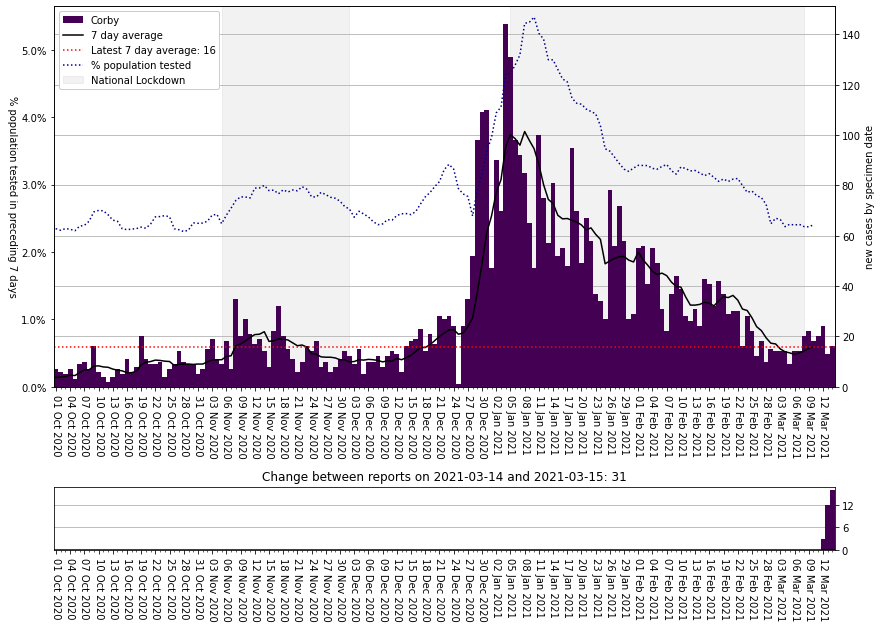

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,97.965174,777.0,2021-03-14
S12000049,Glasgow City,122.251706,774.0,2021-03-14
E08000025,Birmingham,66.735796,762.0,2021-03-14
E08000032,Bradford,133.944451,723.0,2021-03-14
E08000019,Sheffield,90.279096,528.0,2021-03-14
E08000003,Manchester,81.033466,448.0,2021-03-14
E08000036,Wakefield,117.997657,411.0,2021-03-14
E06000010,"Kingston upon Hull, City of",155.902347,405.0,2021-03-14
E08000016,Barnsley,159.195677,393.0,2021-03-14


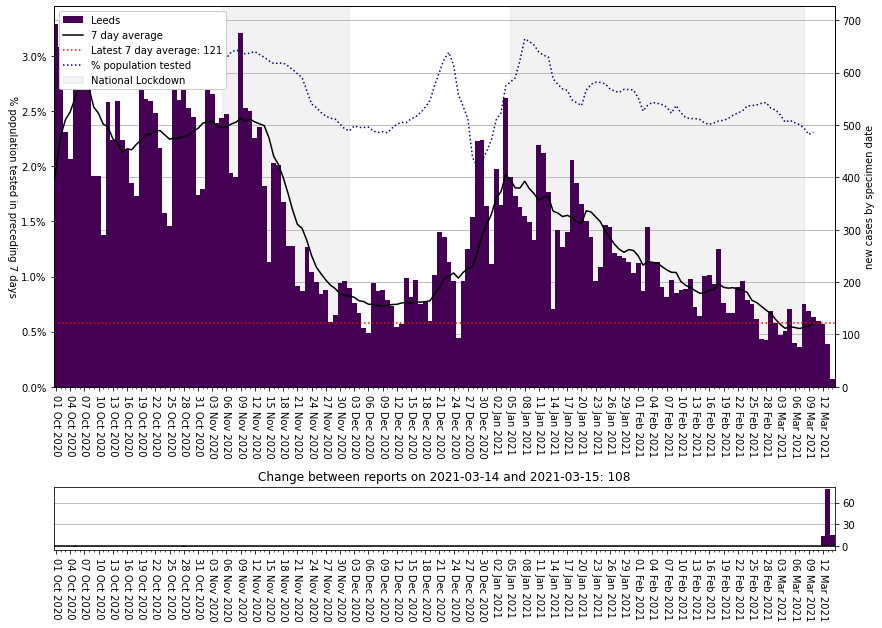

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.5
phe_max = 0.2

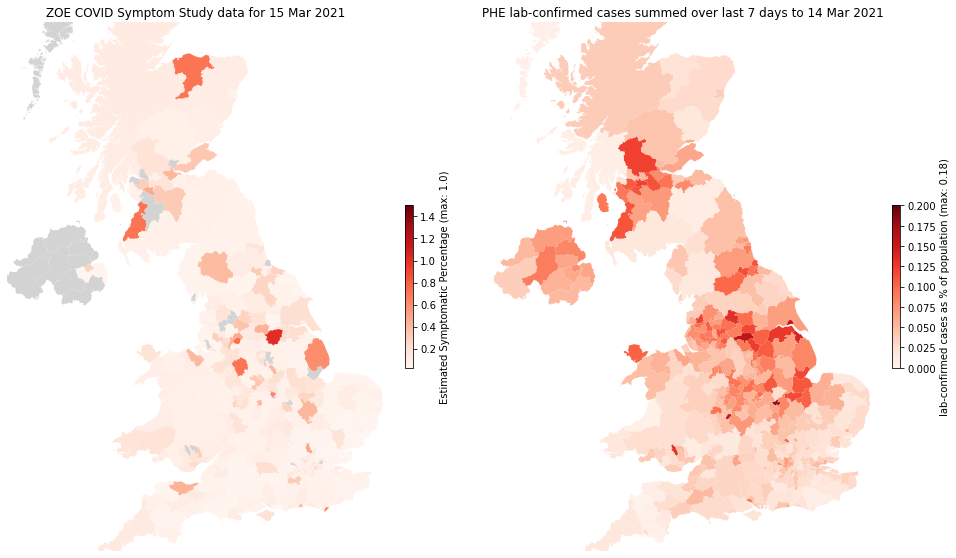

In [14]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

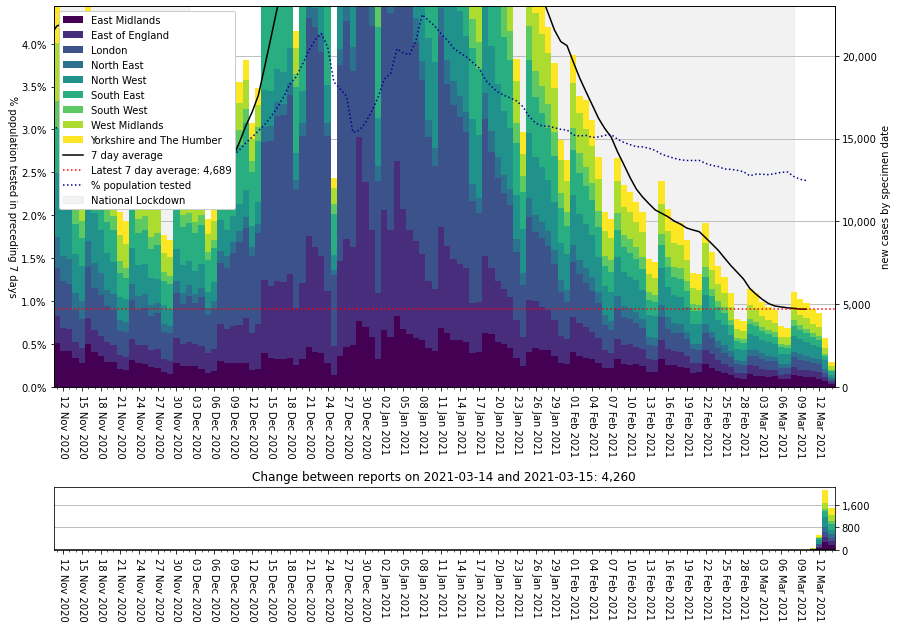

In [16]:
plot_areas(for_date, area_type=region, ylim=23_000, earliest='2020-11-11')

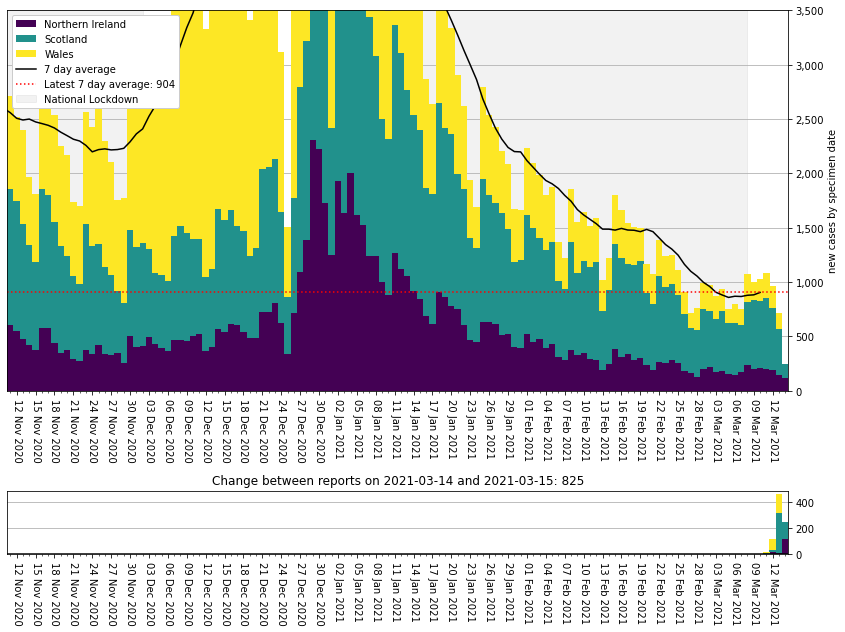

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=3_500, diff_ylims=None, earliest='2020-11-11')